<a href="https://colab.research.google.com/github/fambargh/projectmastery/blob/master/classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
rm -rf train

In [115]:
from zipfile import ZipFile
filename = "train.zip"

with ZipFile(filename,'r') as zip:
  zip.extractall()
  print('Done')

Done


In [0]:
train_dir='/content/train/'
validation_dir='/content/valid/'
num_class=2

In [8]:
from keras.applications import VGG16
vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

In [9]:
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)


<keras.engine.input_layer.InputLayer object at 0x7f1e04daaf28> False
<keras.layers.convolutional.Conv2D object at 0x7f1e04e4cf98> False
<keras.layers.convolutional.Conv2D object at 0x7f1e03c0f198> False
<keras.layers.pooling.MaxPooling2D object at 0x7f1e03c2a240> False
<keras.layers.convolutional.Conv2D object at 0x7f1e03c327f0> False
<keras.layers.convolutional.Conv2D object at 0x7f1e03c35a58> False
<keras.layers.pooling.MaxPooling2D object at 0x7f1e03bbc898> False
<keras.layers.convolutional.Conv2D object at 0x7f1e03bc5710> False
<keras.layers.convolutional.Conv2D object at 0x7f1e03bc5f60> False
<keras.layers.convolutional.Conv2D object at 0x7f1e03bcbd68> False
<keras.layers.pooling.MaxPooling2D object at 0x7f1e03bd77b8> False
<keras.layers.convolutional.Conv2D object at 0x7f1e03bdcfd0> False
<keras.layers.convolutional.Conv2D object at 0x7f1e03be4e80> False
<keras.layers.convolutional.Conv2D object at 0x7f1e03beac88> False
<keras.layers.pooling.MaxPooling2D object at 0x7f1e03b766a0>

In [108]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(2, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_4 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 1024)              8389632   
_________________________________________________________________
dropout_4 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_31 (Dense)             (None, 2)                 2050      
Total params: 23,106,370
Trainable params: 15,471,106
Non-trainable params: 7,635,264
_________________________________________________________________


In [109]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=20,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
# Change the batchsize according to your system RAM
train_batchsize = 100
val_batchsize = 10
 
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=train_batchsize,
        class_mode='categorical')
 
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)

Found 182 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


In [110]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)
 
# Save the model
model.save('small_last4.h5')

Epoch 1/30
2/1 [================================] - 20s 10s/step - loss: 1.8599 - acc: 0.5465 - val_loss: 0.6994 - val_acc: 0.4615
Epoch 2/30
2/1 [================================] - 1s 645ms/step - loss: 0.7431 - acc: 0.5560 - val_loss: 0.6962 - val_acc: 0.5385
Epoch 3/30
2/1 [================================] - 2s 778ms/step - loss: 0.8147 - acc: 0.4845 - val_loss: 0.6888 - val_acc: 0.5385
Epoch 4/30
2/1 [================================] - 2s 777ms/step - loss: 0.7829 - acc: 0.4742 - val_loss: 0.6825 - val_acc: 0.5385
Epoch 5/30
2/1 [================================] - 1s 739ms/step - loss: 0.7258 - acc: 0.5008 - val_loss: 0.6800 - val_acc: 0.5385
Epoch 6/30
2/1 [================================] - 2s 789ms/step - loss: 0.8001 - acc: 0.4816 - val_loss: 0.7349 - val_acc: 0.5385
Epoch 7/30
2/1 [================================] - 1s 746ms/step - loss: 0.7398 - acc: 0.5516 - val_loss: 0.6682 - val_acc: 0.6410
Epoch 8/30
2/1 [================================] - 2s 786ms/step - loss: 0.7

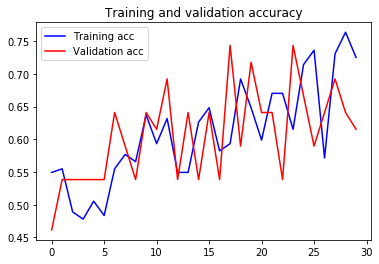

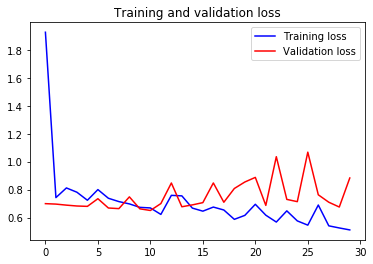

In [111]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
 
epochs = range(len(acc))
 
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
 
plt.figure()
 
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
 
plt.show()

Found 39 images belonging to 2 classes.
4/3 [==============================] - 1s 142ms/step
No of errors = 15/39


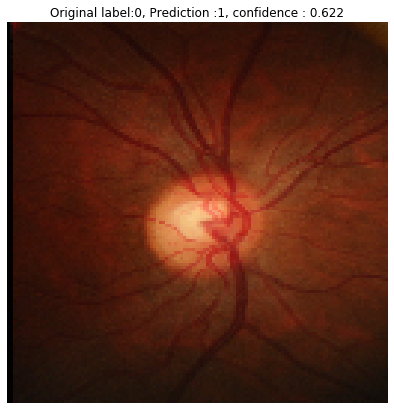

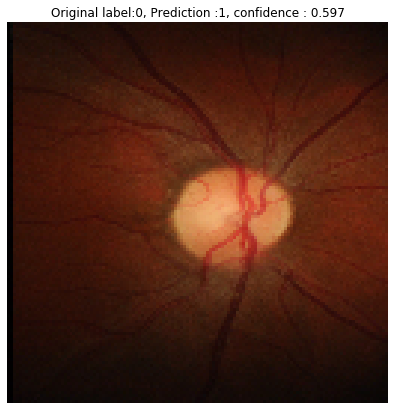

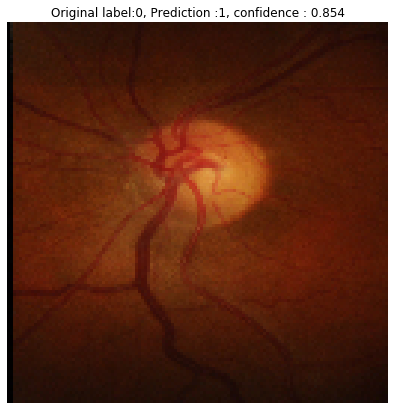

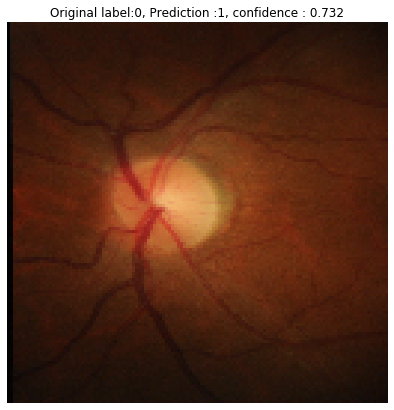

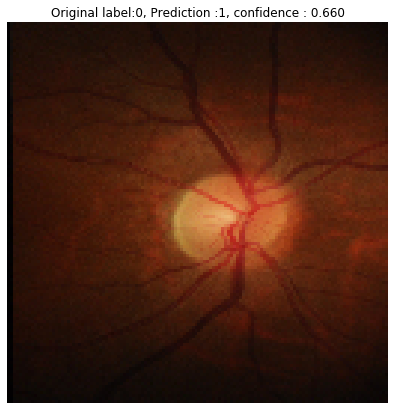

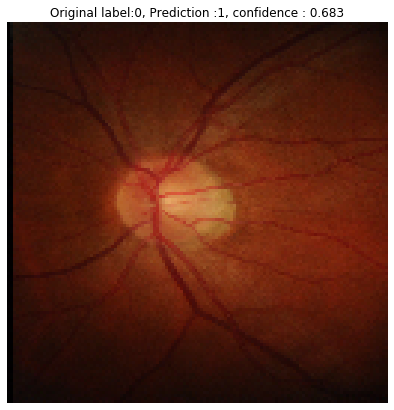

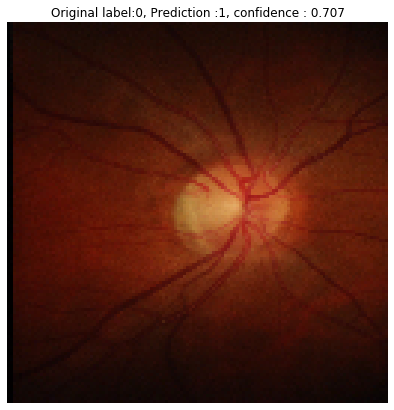

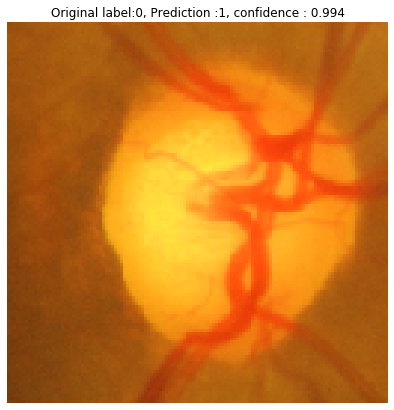

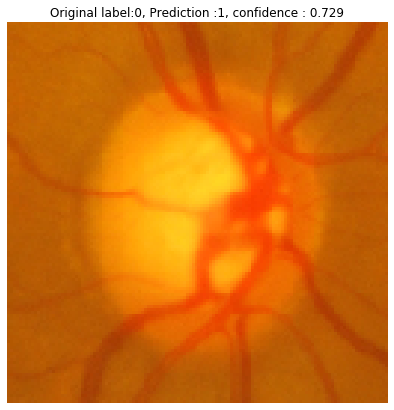

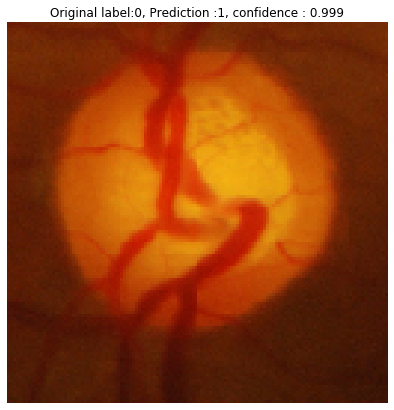

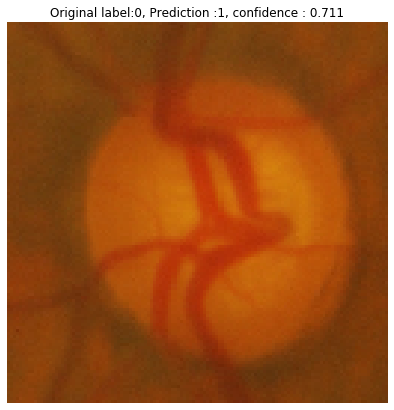

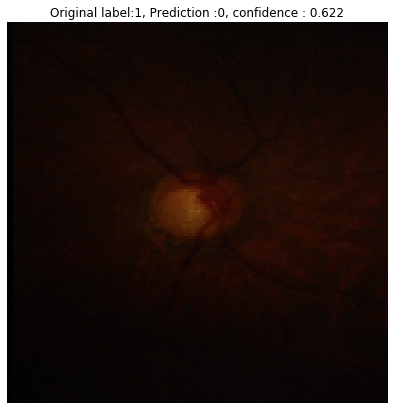

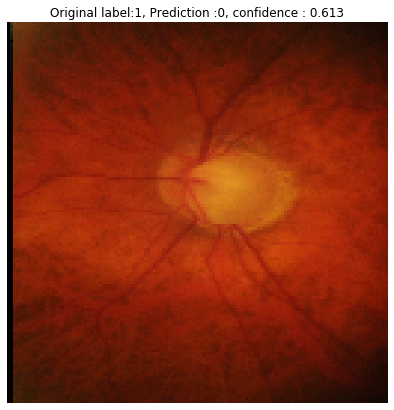

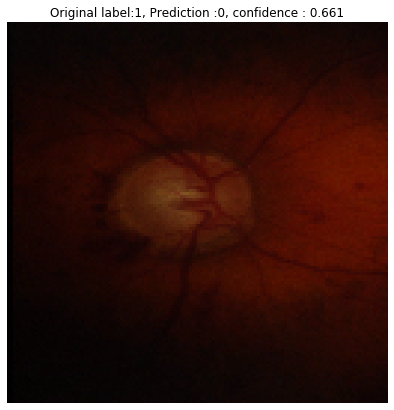

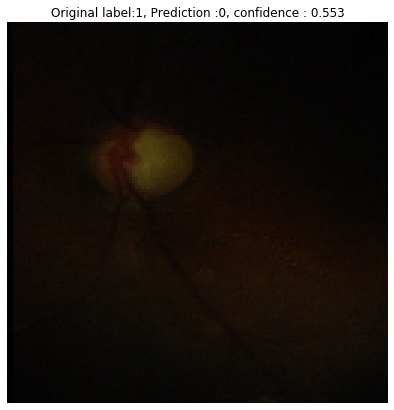

In [113]:
# Create a generator for prediction
validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=val_batchsize,
        class_mode='categorical',
        shuffle=False)
 
# Get the filenames from the generator
fnames = validation_generator.filenames
 
# Get the ground truth from generator
ground_truth = validation_generator.classes
 
# Get the label to class mapping from the generator
label2index = validation_generator.class_indices
 
# Getting the mapping from class index to class label
idx2label = dict((v,k) for k,v in label2index.items())
 
# Get the predictions from the model using the generator
predictions = model.predict_generator(validation_generator, steps=validation_generator.samples/validation_generator.batch_size,verbose=1)
predicted_classes = np.argmax(predictions,axis=1)
 
errors = np.where(predicted_classes != ground_truth)[0]
print("No of errors = {}/{}".format(len(errors),validation_generator.samples))
 
# Show the errors
for i in range(len(errors)):
    pred_class = np.argmax(predictions[errors[i]])
    pred_label = idx2label[pred_class]
     
    title = 'Original label:{}, Prediction :{}, confidence : {:.3f}'.format(
        fnames[errors[i]].split('/')[0],
        pred_label,
        predictions[errors[i]][pred_class])
     
    original = load_img('{}/{}'.format(validation_dir,fnames[errors[i]]))
    plt.figure(figsize=[7,7])
    plt.axis('off')
    plt.title(title)
    plt.imshow(original)
    plt.show()


In [2]:

import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
from os import listdir
from numpy import asarray
from numpy import savez_compressed
from PIL import Image
from matplotlib import pyplot
from keras import layers
import cv2

filenames = listdir("/content/train/")

def load_image(filename, required_size=(150, 150)):
    image = Image.open(filename)
    image = image.resize((150,150))
    pixels = asarray(image)
    return pixels

faces = list()
for filename in filenames:
    pixel = load_image('/content/train/' + filename)
    faces.append(pixel)
    m=asarray(faces)
    c=m[0]
    print(c.shape)

categories = list()
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'N':
        categories.append(0)
    elif category == 'G':
      categories.append(1)
   # else:
     # categories.append(2)
        
y=asarray(categories)

print(y.shape)


Using TensorFlow backend.


(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 150, 3)
(150, 

In [125]:
y

array([0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1])

In [3]:
len(y)

182

In [10]:
# Multiclass Classification with the Iris Flowers Dataset
import numpy
import pandas
#from keras.layers import relu
from keras import models
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# encode class values as integers
###encoder = LabelEncoder()
###encoder.fit(y)
###encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
###dummy_y = np_utils.to_categorical(encoded_Y)
# define baseline model
def baseline_model():
  # Create the model
  model = models.Sequential()
  # Add the vgg convolutional base model
  model.add(vgg_conv)
  # Add new layers
  model.add(layers.Flatten())
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
  return model
estimator = KerasClassifier(build_fn=baseline_model, nb_epoch=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, m, y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Accuracy: 55.38% (15.11%)


In [11]:
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
# Function to create model, required for KerasClassifier
def create_model():
  # Create the model
  model = models.Sequential()
  # Add the vgg convolutional base model
  model.add(vgg_conv)
  # Add new layers
  model.add(layers.Flatten())
  model.add(layers.Dense(1024, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(1, activation='sigmoid'))
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
model = KerasClassifier(build_fn=create_model, verbose=0)
# define the grid search parameters
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(m, y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

ResourceExhaustedError: ignored

In [85]:
# Multiclass Classification with the Iris Flowers Dataset
import numpy
import pandas
#from keras.layers import relu
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(y)
encoded_Y = encoder.transform(y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)
# define baseline model
def baseline_model():
  # create model
  model = Sequential()
  #model.add(Dense(8, in_shape=(128,128,3) , activation= 'relu' ))
  model.add(Dense(8, input_dim=3 , activation= 'relu' ))
  model.add(Dense(1 , activation= 'sigmoid' ))
  # Compile model
  model.compile(loss= 'binary_crossentropy' , optimizer= 'adam' , metrics=[ 'accuracy' ])
  return model
estimator = KerasClassifier(build_fn=baseline_model, nb_epoch=200, batch_size=5, verbose=0)
kfold = KFold(n_splits=10, shuffle=True, random_state=seed)
results = cross_val_score(estimator, m, dummy_y, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: ignored

In [0]:
# IMPORT MODULES
import sys
from os.path import join
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

#import tensorflow as tf
#from tensorflow.python.keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import load_img, img_to_array

from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils, to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.applications import ResNet50
import os

In [44]:
PATH = "/content/"
print(os.listdir(PATH))

['.config', 'sample_data', 'label.csv', '.ipynb_checkpoints', 'train', 'thesis.zip', 'drive', 'classification.zip', 'train.zip', 'valid', 'test']


In [45]:
PATHtrain = PATH + 'train/'
print(len(os.listdir(PATHtrain)), " TRAIN Directories of photos")
Labels = os.listdir(PATHtrain)
sig = 0
for label in sorted(Labels):
    print(label,len(os.listdir(PATHtrain + label +'/')))
    sig = sig + len(os.listdir(PATHtrain + label +'/'))

print("Total TRAIN photos ", sig)
print("_"*50)

2  TRAIN Directories of photos
0 80
1 102
Total TRAIN photos  182
__________________________________________________


In [51]:
Labels

['1', '0']

TRAIN  0  photo number  8


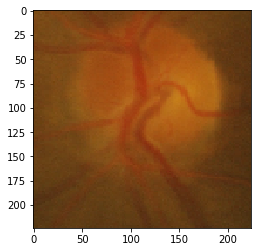

In [48]:

TestNum = 8
diag = '0'

image_dir = PATHtrain +'/'+diag+'/'
img_name = os.listdir(image_dir)[TestNum]
img_path = image_dir+str(img_name)
img = image.load_img(img_path, target_size=(224, 224))
imgplot = plt.imshow(img)
print("TRAIN ",diag," photo number ", TestNum)
plt.show()



In [50]:
len(diag)

1

In [0]:
import argparse

In [0]:
img_size=224
ap = argparse.ArgumentParser()
ap.add_argument("-train","--train_dir",type=str, required=True,help="(required) the train data directory")
ap.add_argument("-num_class","--num_class",type=int, required=True,help="(required) number of classes to be trained")
ap.add_argument("-val","--val_dir",type=str, required=True,help="(required) the validation data directory")

_StoreAction(option_strings=['-val', '--val_dir'], dest='val_dir', nargs=None, const=None, default=None, type=<class 'str'>, choices=None, help='(required) the validation data directory', metavar=None)

In [0]:
from keras.preprocessing.image import ImageDataGenerator


In [0]:

batch_size=10
 
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)
 
test_datagen = ImageDataGenerator(rescale=1. / 255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_size, img_size),
        batch_size=batch_size,
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        val_dir,
        target_size=(img_size,img_size),
        batch_size=batch_size,
        class_mode='binary')

Found 182 images belonging to 2 classes.
Found 39 images belonging to 2 classes.


In [0]:
from keras.layers import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import GlobalAveragePooling2D

In [0]:

img_input=input(shape=(None,), dtype='int32', name='img')
# Block 1
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
x = Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

# Block 2
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
x = Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

# Block 3
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
x = Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

# Block 4
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

# Block 5
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
x = Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
x = MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

if include_top:
  # Classification block
  x = Flatten(name='flatten')(x)
  x = Dense(4096, activation='relu', name='fc1')(x)
  x = Dense(4096, activation='relu', name='fc2')(x)
  x = Dense(classes, activation='softmax', name='predictions')(x)
else:
  if pooling == 'avg':
    x = GlobalAveragePooling2D()(x)
  elif pooling == 'max':
    x = GlobalMaxPooling2D()(x)

TypeError: ignored

In [0]:
if weights == 'imagenet':
        if include_top:
            weights_path = get_file('vgg16_weights_tf_dim_ordering_tf_kernels.h5',
                                    WEIGHTS_PATH,
                                    cache_subdir='models',
                                    file_hash='64373286793e3c8b2b4e3219cbf3544b')
        else:
            weights_path = get_file('vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5',
                                    WEIGHTS_PATH_NO_TOP,
                                    cache_subdir='models',
                                    file_hash='6d6bbae143d832006294945121d1f1fc')
        model.load_weights(weights_path)

In [0]:
base_model = VGG16.VGG16(include_top=False, weights='imagenet')

In [0]:
i=0
for layer in base_model.layers:
    layer.trainable = False
    i = i+1
    print(i,layer.name)

In [0]:
x = base_model.output
x = Dense(128, activation='sigmoid')(x)
x = GlobalAveragePooling2D()(x)
x = Dropout(0.2)(x)
predictions = Dense(args["class"], activation='softmax')(x)